In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Importing the data set

In [81]:
df = pd.read_csv('/Users/siddharth/Code/Python/CustomerChurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [82]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Exploring Churn Distribution

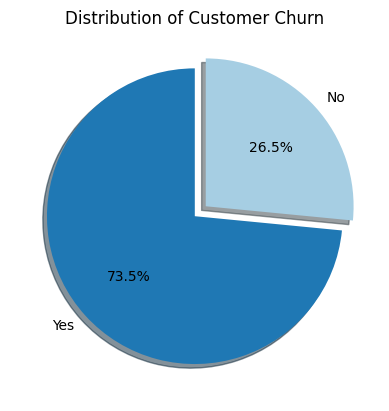

In [123]:
target = df["Churn"].value_counts().to_frame()
target=target.reset_index()
colors = sns.color_palette('Paired')[0:2][::-1]
plt.pie(target['count'], labels=['Yes', 'No'], autopct='%.1f%%', colors=colors, explode=[0,0.1], shadow=True, startangle=90)
plt.title('Distribution of Customer Churn')
plt.show()

In [114]:
def bar_chart(column, df=df):
    cat_df = df.groupby([column, 'Churn']).size().reset_index()
    cat_df=cat_df.rename(columns={0:'Count'})
    
    value_counts_df = df[column].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    print(categories)

    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    percentage = [round(element / sum(num_list)*100, 1) for element in num_list]

    sns.barplot(data=cat_df, x=column, y='Count', hue='Churn', palette='Paired')
    plt.title(f'Churn rate distribution by feature - {column} (Count of {categories[0]} and {categories[1]} is {percentage[0]}% and {percentage[1]}% respectively)')
    plt.show()


['Male', 'Female']


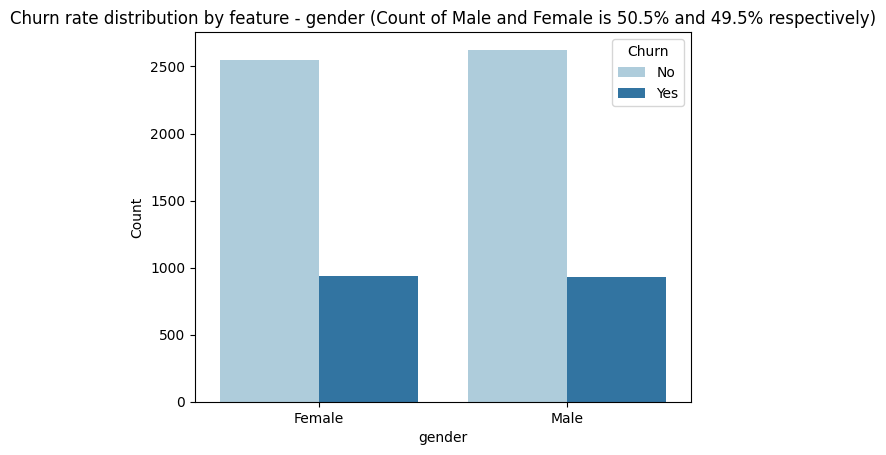

In [115]:
bar_chart('gender')

['No', 'Yes']


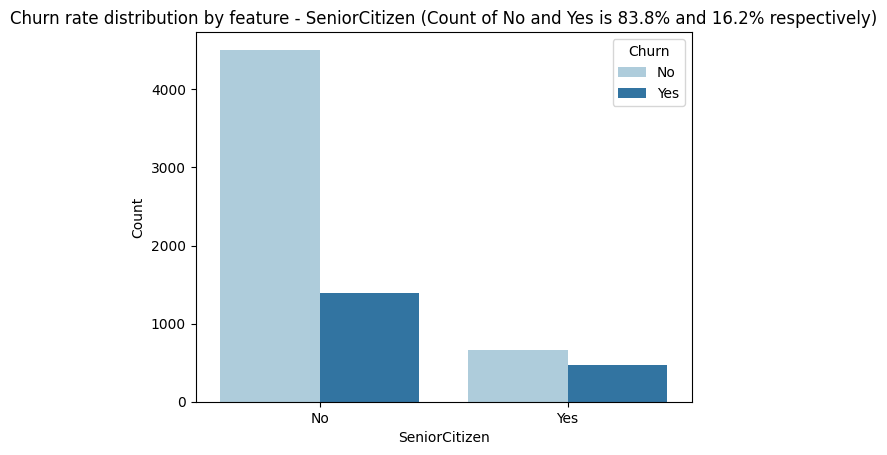

In [116]:
df.loc[df.SeniorCitizen==0,'SeniorCitizen'] = "No" 
df.loc[df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
bar_chart('SeniorCitizen')

['No', 'Yes']


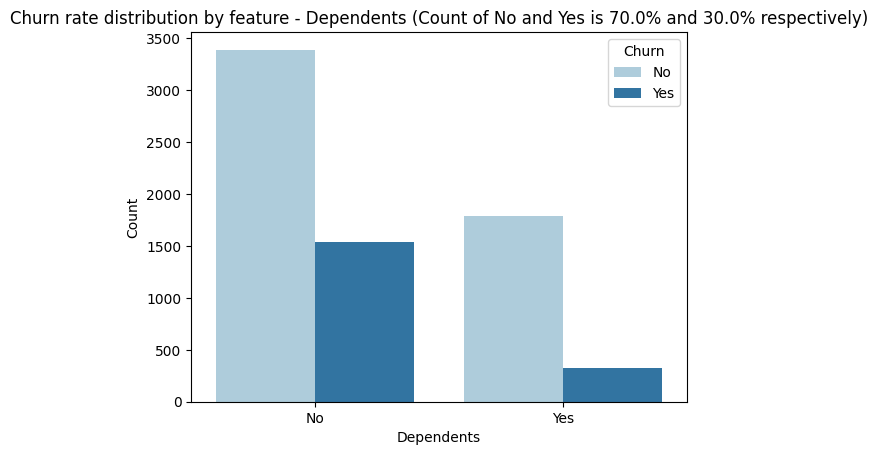

In [117]:
bar_chart('Dependents')

['No', 'Yes']


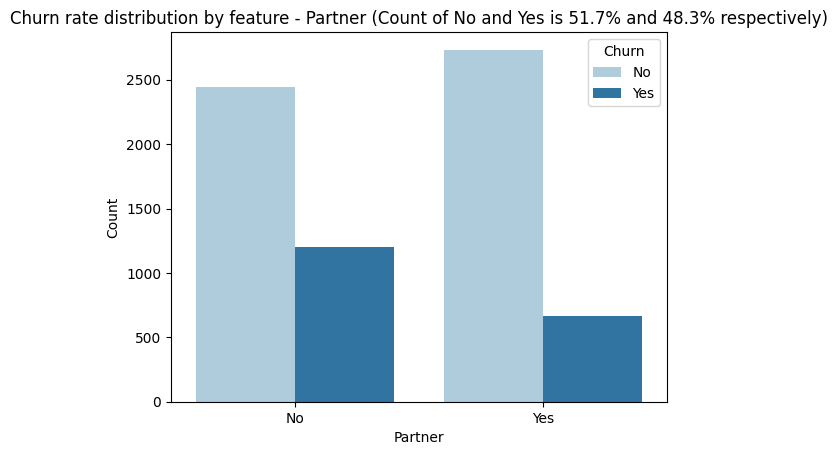

In [118]:
bar_chart('Partner')